In [1]:
import matplotlib.pyplot as plt

In [2]:
from ray.tune import Analysis
# "data/tune/hyperparam_sweep2019_08_13-12_25_44"
# "data/tune/hyperparam_sweep2019_08_13-16_29_46"
# "data/tune/hyperparam_sweep2019_08_13-12_25_44"
analysis = Analysis("data/tune/hyperparam_sweep2019_08_13-23_12_51")

In [3]:
def get_trial_num(trial_name):
    trial_num = trial_name.split("/")[3].split("_")[2]
    return trial_num

8cba7ddf


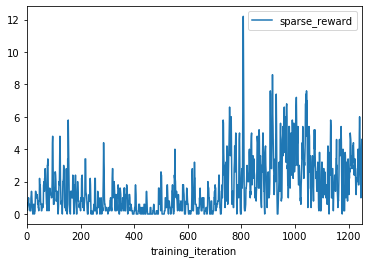

8cba7e46


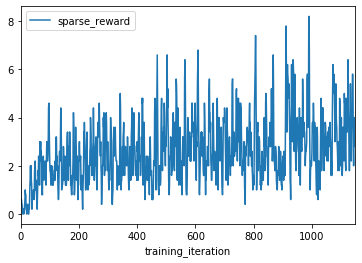

8cba7e0d


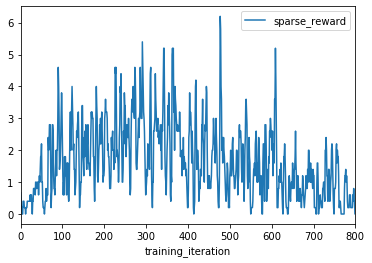

8cba7df2


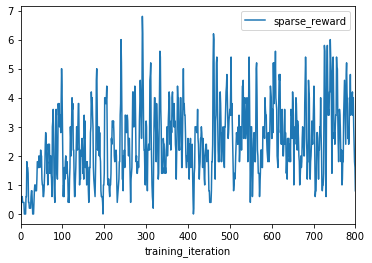

8cba7e05


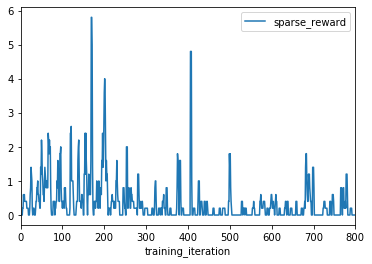

8cba7e1c


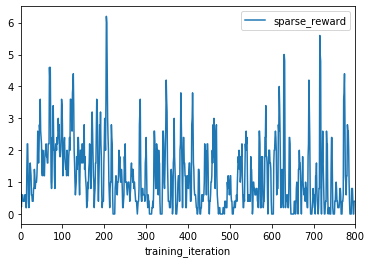

8cba7e1a


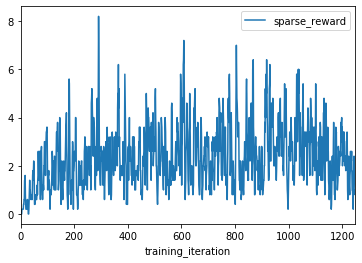

8cba7e1f


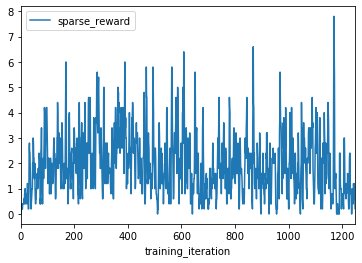

8cba7e53


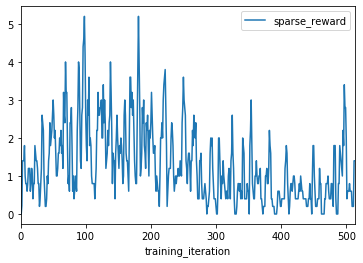

8cba7e31


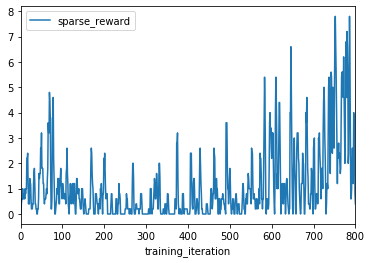

8cba7de3


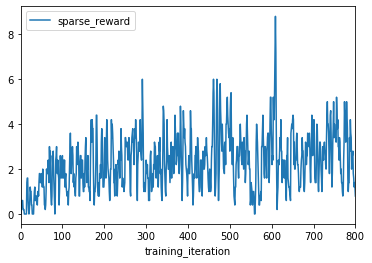

8cba7dee


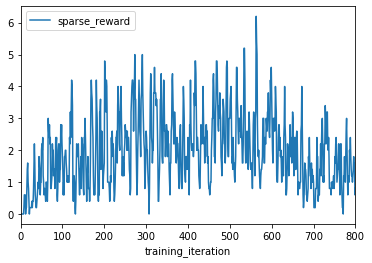

8cba7deb


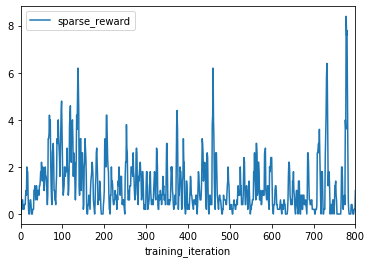

8cba7ddc


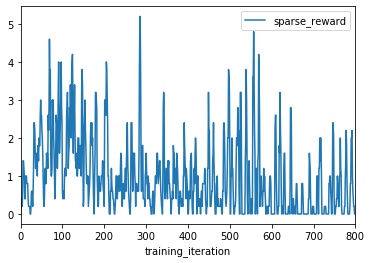

8cba7e2f


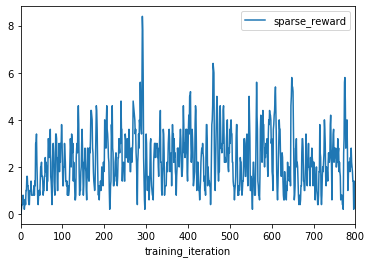

8cba7e28


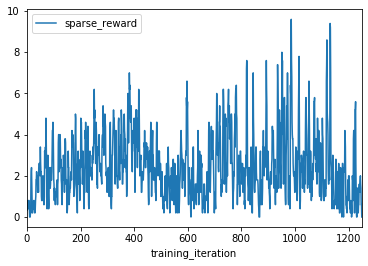

8cba7de6


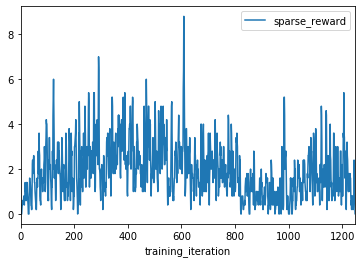

8cba7e39


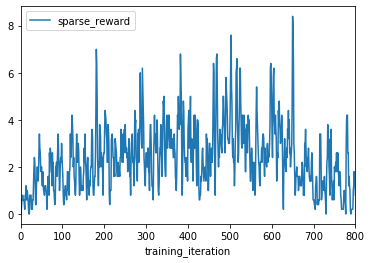

8cba7e4b


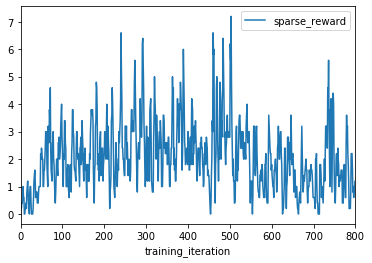

In [6]:
for trial_name, trial_df in analysis.trial_dataframes.items():
    t = trial_df
    if len(t) > 500:
        print(t["trial_id"][0])
        t.plot(y="sparse_reward", x="training_iteration")
        plt.show()

In [29]:
uniform_tune_params = [
    "LR", 
    "GAMMA", 
    "LAM",
    "MAX_GRAD_NORM",
    "CLIPPING"
]
df = analysis.dataframe(metric="sparse_reward", mode="max")
hyperparams_cols = ["config:" + item for item in uniform_tune_params]
hyperparam_cols = [col for col in df if col.startswith('config') and col in hyperparams_cols]
hyperparam_cols

['config:CLIPPING',
 'config:GAMMA',
 'config:LAM',
 'config:LR',
 'config:MAX_GRAD_NORM']

In [32]:
df

,sparse_reward,dense_reward,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,...,config:LOCAL_TESTING,config:LR,config:MAX_GRAD_NORM,config:OTHER_AGENT_TYPE,config:PPO_RUN_TOT_TIMESTEPS,config:REW_SHAPING_HORIZON,config:SEEDS,config:layout_name,config:mdp_generation_params,logdir
0,2.4,8.65,8cba7dfa,33,5.851610,False,NaN,NaN,d0a9d15c288a49ac9b6f3c68ab57f3b0,2019-08-14_02-13-06,...,False,0.000048,0.971169,sp,15000000.0,14000000.0,4891,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
1,1.6,6.59,8cba7de0,48,5.731770,False,NaN,NaN,bf6af7125deb412f8bd97432c2bfa88e,2019-08-13_23-22-46,...,False,0.000013,0.943684,sp,15000000.0,14000000.0,8755,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
2,1.4,8.02,8cba7e40,6,5.680807,False,NaN,NaN,43571c39454648ab87c630491552a7ff,2019-08-14_07-22-34,...,False,0.000907,0.101320,sp,15000000.0,14000000.0,7233,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
3,2.4,9.28,8cba7e1e,45,5.869607,False,NaN,NaN,dddccc9c89c14eb39ce2da6135f6a593,2019-08-14_04-12-03,...,False,0.000082,0.771831,sp,15000000.0,14000000.0,2425,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
4,2.0,7.11,8cba7e2b,34,5.634208,False,NaN,NaN,76e94a71d4024df8a6cffe657d9a1931,2019-08-14_05-35-39,...,False,0.000213,0.578244,sp,15000000.0,14000000.0,4159,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
5,6.2,11.56,8cba7e0d,477,6.080470,False,NaN,NaN,6ea43a2aaf5942498e7511debf785b4e,2019-08-14_04-00-56,...,False,0.000194,0.172725,sp,15000000.0,14000000.0,120,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
6,6.8,15.13,8cba7df2,291,5.750926,False,NaN,NaN,9873659590b54820a7712b9765887ff6,2019-08-14_01-54-37,...,False,0.000040,0.916800,sp,15000000.0,14000000.0,4587,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
7,1.8,7.51,8cba7e02,16,5.702392,False,NaN,NaN,fce241a222874efda214e70cc27a7140,2019-08-14_02-46-19,...,False,0.000012,0.330410,sp,15000000.0,14000000.0,3411,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
8,5.8,15.14,8cba7e05,169,5.481212,False,NaN,NaN,6d37f4804012457389c3e1c20eeb507d,2019-08-14_03-04-44,...,False,0.000637,0.811330,sp,15000000.0,14000000.0,5239,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...
9,1.2,6.91,8cba7ded,44,5.439203,False,NaN,NaN,3393a8a27dab46738d279dfd15ffdc58,2019-08-14_00-53-32,...,False,0.000041,0.440910,sp,15000000.0,14000000.0,4413,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_13-23_12_51/...


wx_rpo14
eaag1yjr
en_l7blg
zw4nbfqq
ldk09e26
e8a02ro2
r0pa1199
3gld4sxj
6e9jam7l
brwkkpru
8ufwcpis
c1zncxsx
2vwwq8sn
ipwegbyq
manrv98d
fki9tx0m
ot75n9ox
stz23lrn
n_9_g1c5
e26wcvh4
8wz3h8a4
ocjp5f0h
6mrekyk9
bwgnm8d3
m9pcef55
lv525q0u
yj46uhrh
6muc1osz
s_cs_1fg
pcx06_zv
1_lxso95
z6tsi0dw
2w438q9o
5cd108pe
15njw5eb
p411ya70
ud4pttkt
w70ha4zi
f9wi16se
7gyix1jp
ybhumpeu


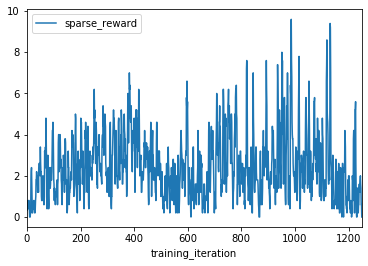

In [53]:
trial_id = "8cba7e28"
for trial_name, trial_df in analysis.trial_dataframes.items():
    print(trial_name[-8:])
    if trial_df['trial_id'][0] == trial_id:
        t = trial_df
        t.plot(y="sparse_reward", x="training_iteration")

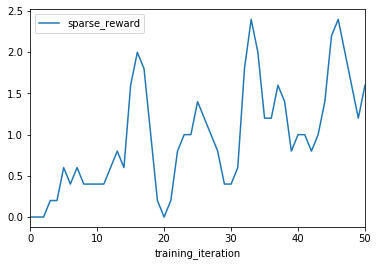

In [45]:
num = 30
for trial_name, trial_df in analysis.trial_dataframes.items():
    if int(get_trial_num(trial_name)) == num:
        t = trial_df
        t.plot(y="sparse_reward", x="training_iteration")

In [46]:
config_vs_reward_df = df.filter(hyperparam_cols + ['sparse_reward', 'dense_reward', 'training_iteration', 'trial_id'])
config_vs_reward_df

,config:CLIPPING,config:GAMMA,config:LAM,config:LR,config:MAX_GRAD_NORM,sparse_reward,dense_reward,training_iteration,trial_id
0,0.087939,0.989456,0.956892,0.000048,0.971169,2.4,8.65,33,8cba7dfa
1,0.090282,0.999268,0.959801,0.000013,0.943684,1.6,6.59,48,8cba7de0
2,0.071394,0.983752,0.998877,0.000907,0.101320,1.4,8.02,6,8cba7e40
3,0.085384,0.957120,0.951154,0.000082,0.771831,2.4,9.28,45,8cba7e1e
4,0.029001,0.955676,0.996057,0.000213,0.578244,2.0,7.11,34,8cba7e2b
5,0.036557,0.982065,0.988319,0.000194,0.172725,6.2,11.56,477,8cba7e0d
6,0.047613,0.954283,0.985396,0.000040,0.916800,6.8,15.13,291,8cba7df2
7,0.092169,0.990985,0.970793,0.000012,0.330410,1.8,7.51,16,8cba7e02
8,0.050817,0.993864,0.978341,0.000637,0.811330,5.8,15.14,169,8cba7e05
9,0.015925,0.983039,0.973566,0.000041,0.440910,1.2,6.91,44,8cba7ded


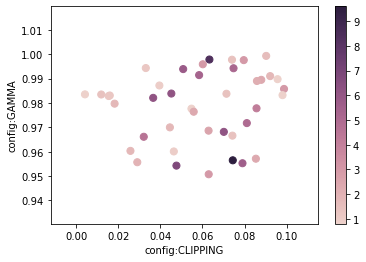

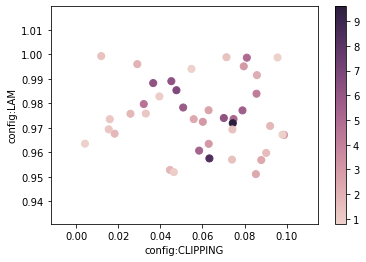

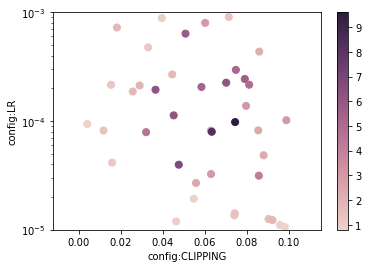

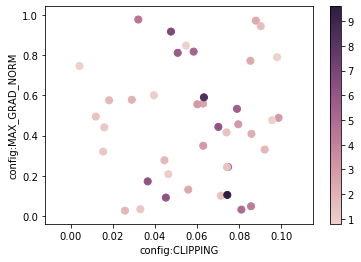

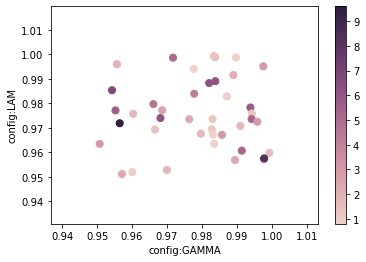

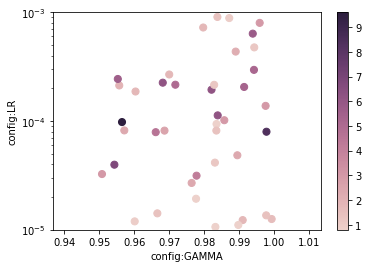

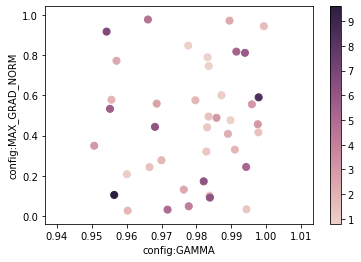

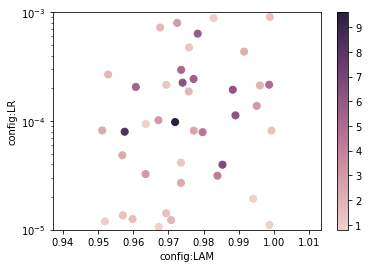

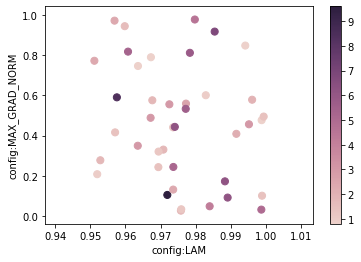

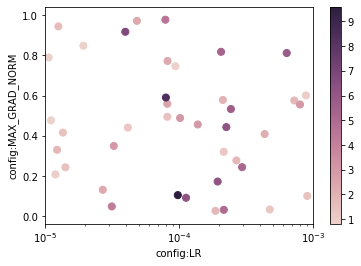

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

log_scale = ["config:LR"]

for x_name, y_name in itertools.combinations(hyperparam_cols, 2):
    

    x, y, z = config_vs_reward_df[x_name], config_vs_reward_df[y_name], config_vs_reward_df['sparse_reward']
    
    cmap = sns.cubehelix_palette(as_cmap=True)
    
    f, ax = plt.subplots()
    points = ax.scatter(x, y, c=z, s=50, cmap=cmap)
    f.colorbar(points)
    
    if x_name in log_scale:
        plt.xscale('log')
        ax.set_xlim((1e-5, 1e-3))
    
    if y_name in log_scale:
        plt.yscale('log')
        ax.set_ylim((1e-5, 1e-3))
    
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    

    plt.show()

1.00001

In [3]:
def loguniform(low=0, high=1, size=None):
    return np.exp(np.random.uniform(np.log(low), np.log(high), size))

In [79]:
loguniform(1e-5, 1e-3)

0.00012190681514866994

(array([1064., 1006.,  974.,  978., 1007., 1006., 1003.,  948.,  969.,
        1045.]), array([-11.51249705, -10.89116445, -10.26983186,  -9.64849927,
         -9.02716667,  -8.40583408,  -7.78450148,  -7.16316889,
         -6.5418363 ,  -5.9205037 ,  -5.29917111]), <a list of 10 Patch objects>)

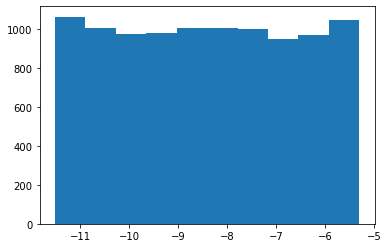

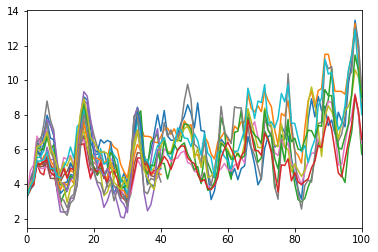

In [8]:
[d.dense_reward.plot() for d in analysis.trial_dataframes.values()]

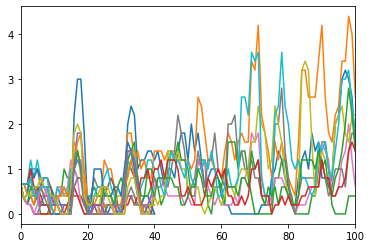

In [9]:
[d.sparse_reward.plot() for d in analysis.trial_dataframes.values()]

In [10]:
df = analysis.dataframe(metric="sparse_reward", mode="max")
df

,sparse_reward,dense_reward,trial_id,training_iteration,time_this_iter_s,done,timesteps_total,episodes_total,experiment_id,date,...,config:LAM,config:LOCAL_TESTING,config:LR,config:MAX_GRAD_NORM,config:OTHER_AGENT_TYPE,config:PPO_RUN_TOT_TIMESTEPS,config:REW_SHAPING_HORIZON,config:layout_name,config:mdp_generation_params,logdir
0,3.200000,10.990000,bcdbeb77,97,5.192365,False,NaN,NaN,54b7ae4b94d04d4ab5dfa135d83eb152,2019-08-12_20-02-08,...,0.995188,False,0.004012,0.500175,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
1,4.400000,13.280000,bcdbeb72,98,4.883483,False,NaN,NaN,a7856d6cf4f0423e8eb8e64c0f77be34,2019-08-12_19-45-58,...,0.962684,False,0.000099,0.180574,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
2,1.600000,8.230000,bcdbeb6b,34,4.848525,False,NaN,NaN,1521ebb440934d32a9f54ab5734ce1bb,2019-08-12_19-27-01,...,0.953396,False,0.004434,0.108227,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
3,0.666667,3.266667,bcdbeb6c,0,16.062005,False,NaN,NaN,10d25ee7a0364978b573d073b516aad7,2019-08-12_19-30-51,...,0.952423,False,0.002506,0.725525,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
4,1.800000,8.880000,bcdbeb66,17,4.783465,False,NaN,NaN,cd5e29511bdd4ea69830ab0354816148,2019-08-12_19-10-06,...,0.956022,False,0.003321,0.490310,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
5,1.000000,5.120000,bcdbeb6d,32,5.048109,False,NaN,NaN,02e366a07c7c43bfb1d28f6cca1dc9ae,2019-08-12_19-34-44,...,0.984836,False,0.003030,0.954135,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
6,2.000000,9.220000,bcdbeb6a,98,4.863689,False,NaN,NaN,fefeb37c65124070a5d084342729f3a8,2019-08-12_19-30-22,...,0.960185,False,0.002796,0.962150,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
7,2.800000,10.380000,bcdbeb64,78,4.864505,False,NaN,NaN,a0be63f8153b435296a5ffc4744105df,2019-08-12_19-11-35,...,0.965106,False,0.001025,0.110618,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
8,3.400000,9.610000,bcdbeb68,85,4.997366,False,NaN,NaN,56162f75113b43bcb1c214919e8b699f,2019-08-12_19-20-45,...,0.984482,False,0.000848,0.053443,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...
9,3.600000,8.800000,bcdbeb76,69,4.833080,False,NaN,NaN,66c75a0160e04e148a4c0811839ad2d7,2019-08-12_19-52-04,...,0.977024,False,0.000179,0.618762,sp,6000000.0,7500000.0,random,"{'prop_empty': [0.99, 1], 'prop_feats': [0, 0....",data/tune/hyperparam_sweep2019_08_12-19_04_51/...


In [6]:
from overcooked_ai_py.utils import load_pickle, save_pickle

from human_aware_rl.utils import reset_tf
from human_aware_rl.ppo.ppo import ex as ex_ppo
from human_aware_rl.imitation.behavioural_cloning import get_bc_agent_from_saved
from human_aware_rl.experiments.bc_experiments import BEST_BC_MODELS_PATH

import time
import numpy as np
from ray import tune

def fun(lr, grl=1):
    def boi(t):
        return lr * 10 + 0.1 * t + grl
    return boi

def train_ppo(config):
    optimizer = fun(lr=config["lr"])
    for i in range(3):
        time.sleep(np.random.uniform(0, 3))
        acc = optimizer(i)
        tune.track.log(sparse_reward=acc, timesteps_total=i, episodes_total=0)

# def train_ppo(config):
#     from human_aware_rl.ppo.ppo import ex as ex_ppo, ppo_run, my_config
#     lr = config["lr"]
#     seed = np.random.randint(0, 10000)
#     run = ex_ppo.run(config_updates={'LOCAL_TESTING': True, 'layout_name': 'simple', 'OTHER_AGENT_TYPE': 'sp', 'LR': lr, 'TRACK_TUNE':True, 'SEEDS':[seed]})
#     train_info = run.result[0]

# def train_ppo(config):
#     lr = config["lr"]
#     params = my_config()
#     params["LR"] = lr
#     params["OTHER_AGENT_TYPE"] = "sp"
#     params["TRACK_TUNE"] = True
#     ok = ppo_run(params)
#     train_info = ok[0]

search_space = {
    "lr": tune.sample_from(lambda spec: loguniform(1e-5, 1e-3))
}

analysis = tune.run(
    train_ppo, 
    name="example",
    config=search_space,
    scheduler=tune.schedulers.AsyncHyperBandScheduler(metric="sparse_reward", grace_period=10, mode="max"),
    num_samples=3
)

2019-08-13 22:21:41,253	INFO function_runner.py:249 -- tune.track signature detected.
2019-08-13 22:21:41,259	INFO trial_runner.py:176 -- Starting a new experiment.


== Status ==
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 40.000: None | Iter 10.000: None
Resources requested: 0/8 CPUs, 0/0 GPUs
Memory usage on this node: 10.0/17.2 GB

== Status ==
Using AsyncHyperBand: num_stopped=0
Bracket: Iter 40.000: None | Iter 10.000: None
Resources requested: 1/8 CPUs, 0/0 GPUs
Memory usage on this node: 10.1/17.2 GB
Result logdir: /Users/micah/ray_results/example
Number of trials: 3 ({'RUNNING': 1, 'PENDING': 2})
PENDING trials:
 - train_ppo_1_lr=2.7098e-05:	PENDING
 - train_ppo_2_lr=0.00033291:	PENDING
RUNNING trials:
 - train_ppo_0_lr=8.5406e-05:	RUNNING

Result for train_ppo_1_lr=2.7098e-05:
  date: 2019-08-13_22-21-42
  done: false
  episodes_total: 0
  experiment_id: d60ca358e5a142b5bbd55217c083fa6e
  hostname: Micahs-MacBook-Pro.local
  iterations_since_restore: 1
  node_ip: 10.0.0.62
  pid: 29276
  sparse_reward: 1.0002709774929948
  time_since_restore: 0.5399558544158936
  time_this_iter_s: 0.5399558544158936
  time_total_s: 0.5399558544158936

In [7]:
np.__version__

'1.15.1'

In [3]:
df = analysis.dataframe(metric="sparse_reward", mode="max")
df

2019-08-13 11:56:38,781	WARNING experiment_analysis.py:79 -- Couldn't read config from 2 paths


,sparse_reward,timesteps_total,episodes_total,trial_id,training_iteration,time_this_iter_s,done,experiment_id,date,timestamp,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,config:lr,logdir
0,1.205214,2,0,0ceadee8,2,0.984424,False,2e2d9566c5b849f0bb95124bd3f465b0,2019-08-13_11-56-31,1565722591,4.700129,26380,Micahs-MacBook-Pro.local,10.142.37.199,4.700129,0,3,0.000521,/Users/micah/ray_results/example/train_ppo_0_l...


In [4]:
print("Best config: ", analysis.get_best_config(metric="sparse_reward", mode="max"))
print("Best config: ", analysis.get_best_config(metric="dense_reward", mode="max"))

Best config:  {'lr': 0.00014073910418733337}
Best config:  {'lr': 0.0007928602381550028}


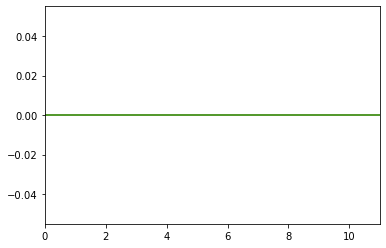

In [5]:
[d.sparse_reward.plot() for d in analysis.trial_dataframes.values()]

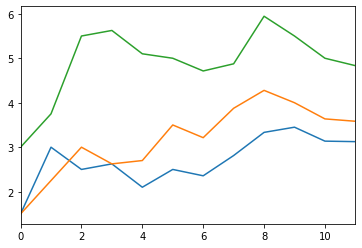

In [6]:
[d.dense_reward.plot() for d in analysis.trial_dataframes.values()]